# List of operation to perform and description
Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year


In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [5]:
df.Store=df.Store.astype('category')

In [6]:
df.Weekly_Sales.groupby(df.Store).sum().sort_values(ascending=False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [7]:
# store 20 has maximum sales

In [8]:
# # Which store has maximum standard deviation i.e., the sales vary a lot. 
# Also, find out the coefficient of mean to standard deviation

In [9]:
df.Weekly_Sales.groupby(df.Store).std().sort_values(ascending=False)

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

In [10]:
df.Weekly_Sales.groupby(df.Store).var().sort_values(ascending=False)

Store
14    1.008507e+11
10    9.136235e+10
20    7.612112e+10
4     7.086321e+10
13    7.049396e+10
23    6.239406e+10
27    5.756647e+10
2     5.649354e+10
39    4.729166e+10
6     4.516724e+10
35    4.462380e+10
19    3.675757e+10
41    3.530910e+10
28    3.303632e+10
18    3.120222e+10
24    2.813861e+10
11    2.750088e+10
22    2.600200e+10
1     2.433000e+10
12    1.936742e+10
32    1.904876e+10
45    1.694385e+10
21    1.657729e+10
31    1.583972e+10
15    1.452957e+10
40    1.416150e+10
25    1.276375e+10
7     1.267549e+10
17    1.258052e+10
26    1.219507e+10
8     1.129561e+10
34    1.094747e+10
29    9.824801e+09
16    7.356438e+09
9     4.764957e+09
36    3.687547e+09
42    2.526362e+09
3     2.145508e+09
38    1.829116e+09
43    1.648231e+09
5     1.424154e+09
44    6.131978e+08
33    5.823982e+08
30    5.202808e+08
37    4.768747e+08
Name: Weekly_Sales, dtype: float64

In [11]:
# store 14 has max standard deviation and varience

In [12]:
# Which store/s has good quarterly growth rate in Q3’2012

In [13]:
df.Date=pd.to_datetime(df.Date)

In [14]:
q2_from=pd.Timestamp(2012,4,1)
q2_to=pd.Timestamp(2012,6,30)
q3_from=pd.Timestamp(2012,7,1)
q3_to=pd.Timestamp(2012,9,30)

In [15]:
q2_data=df[(df.Date>q2_from) & (df.Date<q2_to)]
q3_data=df[(df.Date>q3_from) & (df.Date<q3_to)]

In [16]:
q2=pd.DataFrame(q2_data.Weekly_Sales.groupby(q2_data.Store).sum())
q3=pd.DataFrame(q3_data.Weekly_Sales.groupby(q3_data.Store).sum())

In [17]:
q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)
q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

In [18]:
q3_growth= q2.merge(q3,how='inner',on='Store')

In [19]:
q3_growth

,Q2_Weekly_Sales,Q3_Weekly_Sales
Store,,
1,21036965.58,18633209.98
2,25085123.61,22396867.61
3,5562668.16,4966495.93
4,28384185.16,25652119.35
5,4427262.21,3880621.88
6,20728970.16,18341221.11
7,7613593.92,7322393.92
8,11934275.61,10873860.34
9,7431320.13,6528239.56


In [20]:
q3_growth['Growth_Rate'] =(q3_growth['Q3_Weekly_Sales'] - q3_growth['Q2_Weekly_Sales'])/q3_growth['Q2_Weekly_Sales']
q3_growth['Growth_Rate']=round(q3_growth['Growth_Rate'],2)
q3_growth.sort_values('Growth_Rate',ascending=False).head(1)

,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
Store,,,
16,6626133.44,6441311.11,-0.03


In [21]:
q3_growth

,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
Store,,,
1,21036965.58,18633209.98,-0.11
2,25085123.61,22396867.61,-0.11
3,5562668.16,4966495.93,-0.11
4,28384185.16,25652119.35,-0.10
5,4427262.21,3880621.88,-0.12
6,20728970.16,18341221.11,-0.12
7,7613593.92,7322393.92,-0.04
8,11934275.61,10873860.34,-0.09
9,7431320.13,6528239.56,-0.12


In [22]:
# since every store is in losses from q2 to q3, the store 16 has least amount of losses.So store 16 has lowest losses at -0.03
# it has the highest growth rate

In [23]:
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales 
# in non-holiday season for all stores together
#list of holidays
# Super Bowl: 12-2-10, 11-2-11, 10-2-12, 8-2-13
# Labour Day: 10-9-10, 9-9-11, 7-9-12, 6-9-13 
# Thanksgiving: 26-11-10, 25-11-11, 23-11-12, 29-11-13 
# Christmas: 31-12-10, 30-12-11, 28-12-12, 27-12-13

In [24]:
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

In [25]:
df.Weekly_Sales.groupby(df.Holiday_Flag).mean().sort_values(ascending=False)

Holiday_Flag
1    1.122888e+06
0    1.041256e+06
Name: Weekly_Sales, dtype: float64

In [26]:
Christmas_mean=df[(df['Date'] == Christmas1) | (df['Date'] == Christmas2) | (df['Date'] == Christmas3) |
                          (df['Date'] == Christmas4)]
Thanksgiving_mean=df[(df['Date'] == Thanksgiving1) | (df['Date'] == Thanksgiving2) | (df['Date'] == Thanksgiving3) |
                             (df['Date'] == Thanksgiving4)]
LabourDay_mean=df[(df['Date'] == LabourDay1) | (df['Date'] == LabourDay2) | (df['Date'] == LabourDay3) | 
                          (df['Date'] == LabourDay4)]
SuperBowl_mean=df[(df['Date'] == SuperBowl1) | (df['Date'] == SuperBowl2) | (df['Date'] == SuperBowl3) |
                          (df['Date'] == SuperBowl4)]

In [27]:
list_of_mean_sales = {'Christmas_mean' : round(Christmas_mean['Weekly_Sales'].mean(),2),
'Thanksgiving_means': round(Thanksgiving_mean['Weekly_Sales'].mean(),2),
'LabourDay_mean' : round(LabourDay_mean['Weekly_Sales'].mean(),2),
'SuperBowl_mean':round(SuperBowl_mean['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}



In [28]:
list_of_mean_sales

{'Christmas_mean': 960833.11,
 'Thanksgiving_means': 1471273.43,
 'LabourDay_mean': 1008369.41,
 'SuperBowl_mean': nan,
 'Non holiday weekly sales': 1041256.3802088564}

In [29]:
#thanksgiving has the highest mean

In [30]:
# Provide a monthly and semester view of sales in units and give insights

In [31]:
df.dtypes

Store                 category
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Day                      int64
Month                    int64
Year                     int64
dtype: object

In [32]:
seg=df[['Date','Weekly_Sales']]

In [33]:
seg

,Date,Weekly_Sales
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-05-10,733455.07
6432,2012-12-10,734464.36
6433,2012-10-19,718125.53


In [34]:
#monthly variable wil be created
monthly=seg.resample('M',on='Date').sum()

In [35]:
monthly

,Weekly_Sales
Date,
2010-01-31,4.223988e+07
2010-02-28,1.915869e+08
2010-03-31,1.862262e+08
2010-04-30,1.838118e+08
2010-05-31,2.806119e+08
2010-06-30,1.424361e+08
2010-07-31,1.842664e+08
2010-08-31,1.845381e+08
2010-09-30,1.797041e+08


Text(0, 0.5, 'Weekly_Sales')

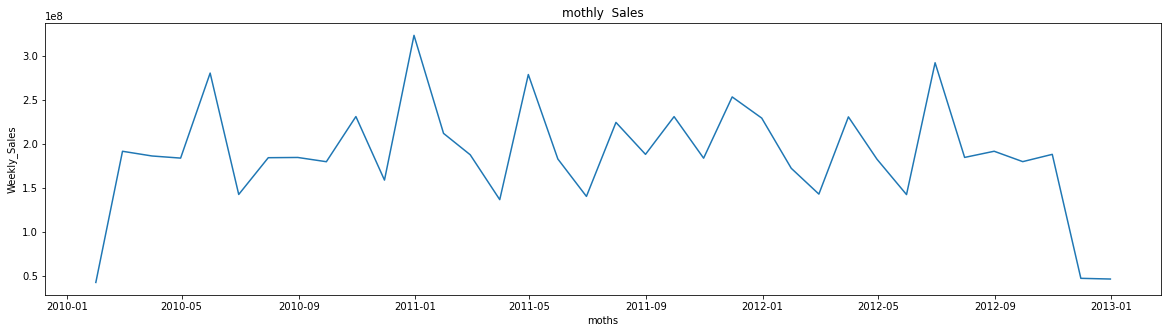

In [36]:
plt.subplots(figsize=(20,5))
plt.plot(monthly)
plt.title('mothly  Sales')
plt.xlabel('moths')
plt.ylabel('Weekly_Sales')

In [37]:
# insights:-
#     1)we can at the begining of the graph from 2010-01 to 2010-05 has the lowest 
#     amount of sales
#     2)And also from 2012-09 to 2013-01 the same is repeated that is lowest
#     number of sales 
#     3)the time in between 2011-01 to 2011-05 has the highest number if sales recorded

In [38]:
semister=seg.resample('6M',on='Date').sum()

In [39]:
semister

,Weekly_Sales
Date,
2010-01-31,4.223988e+07
2010-07-31,1.168939e+09
2011-01-31,1.289673e+09
2011-07-31,1.150555e+09
2012-01-31,1.257900e+09
2012-07-31,1.175370e+09
2013-01-31,6.525423e+08


Text(0, 0.5, 'Weekly_Sales')

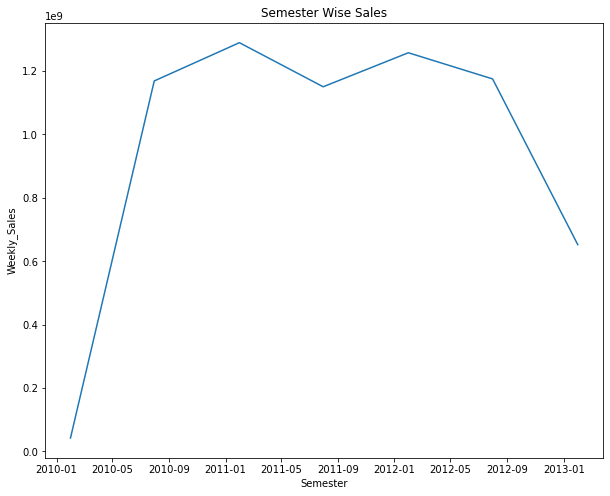

In [40]:
plt.subplots(figsize=(10,8))
plt.plot(semister)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

In [41]:
# insights:-
#     1)the time period between 2010-01 to 2010-09 has the least amount of sales
#     but from 2010-01 to 2010-09 there is gradually a study increase in sales till
#      2010-09
#     2)after 2010-09 there is decrease in pace of sales till 2011-01
#     3)from there on he weekly sales have little of dip and raise of 0.1
#     4)from 2012-09 there is constant dip in sales till 2013-01

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

In [42]:
store1=df[df.Store==1]

In [43]:
store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,10,5,2012
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,10,12,2012
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012


In [44]:
# change date into days by creting a new variable

In [45]:
import datetime

x = datetime.datetime(2018, 9, 15)

print(x.strftime("%b %d %Y %H:%M:%S"))

Sep 15 2018 00:00:00


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
lable=LabelEncoder()

In [48]:
store1['days']=lable.fit_transform(store1.Date)

<ipython-input-48-aa728bb6480f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['days']=lable.fit_transform(store1.Date)


In [49]:
store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,13
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,42
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,14
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012,136
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,10,5,2012,116
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,10,12,2012,142
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012,139


<AxesSubplot:>

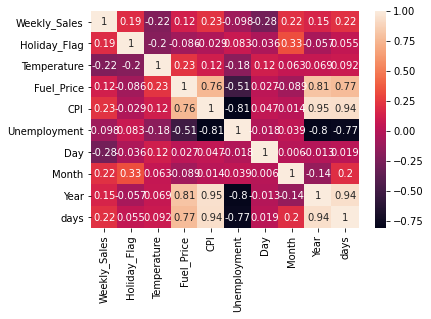

In [50]:
store1.corr()
sns.heatmap(store1.corr(), annot=True)

In [51]:
store1.cov()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,days
Weekly_Sales,2.433000e+10,7780.511158,-495019.204784,8304.344590,152974.074690,-5863.358806,-384010.493608,114164.723355,19010.901463,1.405879e+06
Holiday_Flag,7.780511e+03,0.065498,-0.731393,-0.009394,-0.032202,0.008147,-0.081011,0.283414,-0.011622,5.845070e-01
Temperature,-4.950192e+05,-0.731393,203.076363,1.391386,7.347479,-0.988150,14.834853,2.970766,0.784605,5.440049e+01
Fuel_Price,8.304345e+03,-0.009394,1.391386,0.182596,1.404169,-0.084277,0.101936,-0.126877,0.276736,1.370588e+01
CPI,1.529741e+05,-0.032202,7.347479,1.404169,18.930245,-1.358210,1.800893,0.203415,3.299209,1.700097e+02
Unemployment,-5.863359e+03,0.008147,-0.988150,-0.084277,-1.358210,0.147263,-0.061317,0.050377,-0.244957,-1.225682e+01
Day,-3.840105e+05,-0.081011,14.834853,0.101936,1.800893,-0.061317,77.158574,0.174480,-0.089776,6.964789e+00
Month,1.141647e+05,0.283414,2.970766,-0.126877,0.203415,0.050377,0.174480,11.110312,-0.370580,2.769014e+01
Year,1.901090e+04,-0.011622,0.784605,0.276736,3.299209,-0.244957,-0.089776,-0.370580,0.639614,3.119718e+01
days,1.405879e+06,0.584507,54.400493,13.705880,170.009734,-12.256824,6.964789,27.690141,31.197183,1.716000e+03


In [52]:
# #  Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

# As we can see unemployment is highly correlated with days and is insignificant as it correlation with Weekly Sales is 
# quite low. Also temperature and Unemployment are negatively impacting the sales . however Fuel Price and CPI are positively 
# impacting the Sales.

In [53]:
store1=store1.drop(['Store','Date'],axis=1)

In [54]:
y=store1.Weekly_Sales
x=store1.drop('Weekly_Sales',axis=1)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 123)

In [56]:
print("Shape of X_train is " , x_train.shape)
print("Shape of y_train is " , y_train.shape)

print("Shape of X_test is " , x_test.shape)
print("Shape of y_test is " , y_test.shape)

Shape of X_train is  (114, 9)
Shape of y_train is  (114,)
Shape of X_test is  (29, 9)
Shape of y_test is  (29,)


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg=LinearRegression()

In [59]:
model=reg.fit(x_train,y_train)

In [60]:
model.score(x_train,y_train)

0.32153374247270894

Mean Absolute Error: 89122.34249897461
Mean Squared Error: 17240552560.433132
Root Mean Squared Error: 131303.2846521104


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


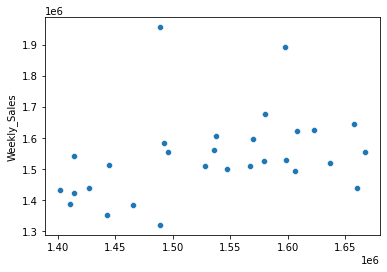

In [61]:
y_pred=model.predict(x_test)
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca=PCA()
xtrain=pca.fit_transform(x_train)
xtest=pca.fit_transform(x_test)
xtrain.shape,xtest.shape

((114, 9), (29, 9))

In [64]:
model=reg.fit(xtrain,y_train)

In [65]:
model.score(xtrain,y_train)

0.32153374247268285

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rtf=RandomForestRegressor()

Random Forest Regressor:

Accuracy: 42.323412888937305
Mean Absolute Error: 73694.95663110662
Mean Squared Error: 10636173720.455671
Root Mean Squared Error: 103131.82690351059


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


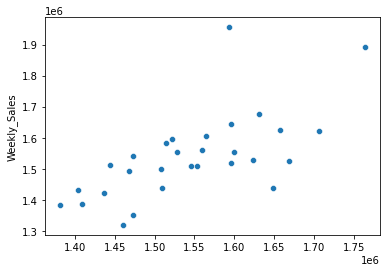

In [69]:
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

In [70]:
y_test.shape

(29,)